In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# data set imported from drive
train=pd.read_csv('/content/drive/MyDrive/credit_score/train.csv')
test=pd.read_csv('/content/drive/MyDrive/credit_score/test.csv')

In [4]:
print(train.head())

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


In [5]:
train.shape

(100000, 28)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [8]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,5642,3392,9,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,35.030402,273.0,No,49.574949,21.465380,Low_spent_Small_value_payments,186.266702
1,5643,3392,10,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,5644,3392,11,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.811894,275.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,264.675446
3,5645,3392,12,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,32.430559,276.0,No,49.574949,21.465380,High_spent_Medium_value_payments,343.826873
4,5654,8625,9,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,5.0,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  object 
 4   Age                       50000 non-null  float64
 5   SSN                       50000 non-null  float64
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  float64
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  float64
 13  Type_of_Loan              50000 non-null  object 
 14  Delay_

In [10]:
x=train.copy(deep=True)
col_drop=['Month','Name','Age','SSN','Occupation','Annual_Income','Payment_of_Min_Amount','Type_of_Loan']
x.drop(col_drop,axis=1,inplace=True)

In [11]:
x_test=test.copy(deep=True)
x_test.drop(col_drop,axis=1,inplace=True)

In [12]:
x.head()

,ID,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


**EDA**

In [13]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [14]:
#Before training our model we have to impute the "Credit_Mix" & "Payment_Behaviour"

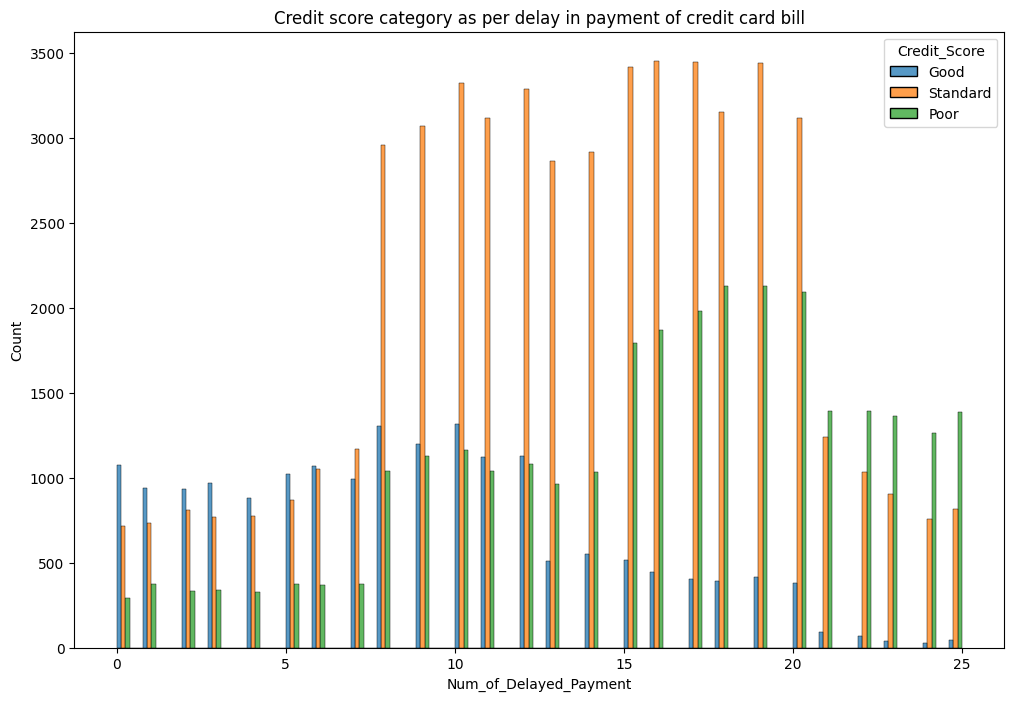

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(data=x,x='Num_of_Delayed_Payment',hue='Credit_Score',multiple='dodge')
plt.title('Credit score category as per delay in payment of credit card bill')
plt.show()

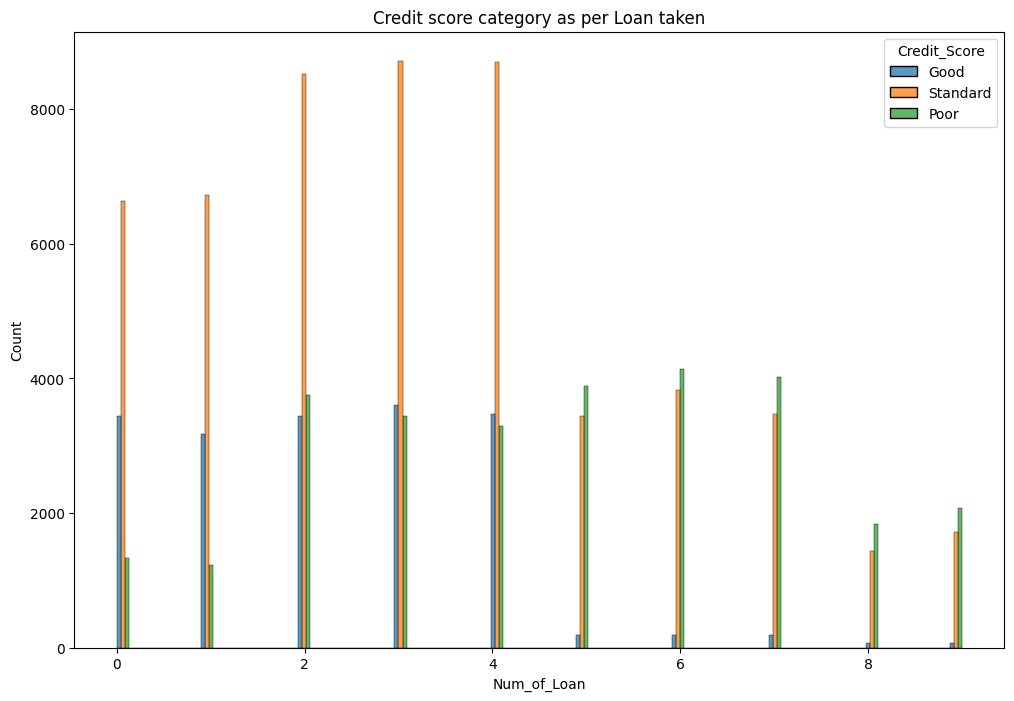

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(data=x,x='Num_of_Loan',hue='Credit_Score',multiple='dodge')
plt.title('Credit score category as per Loan taken')
plt.show()

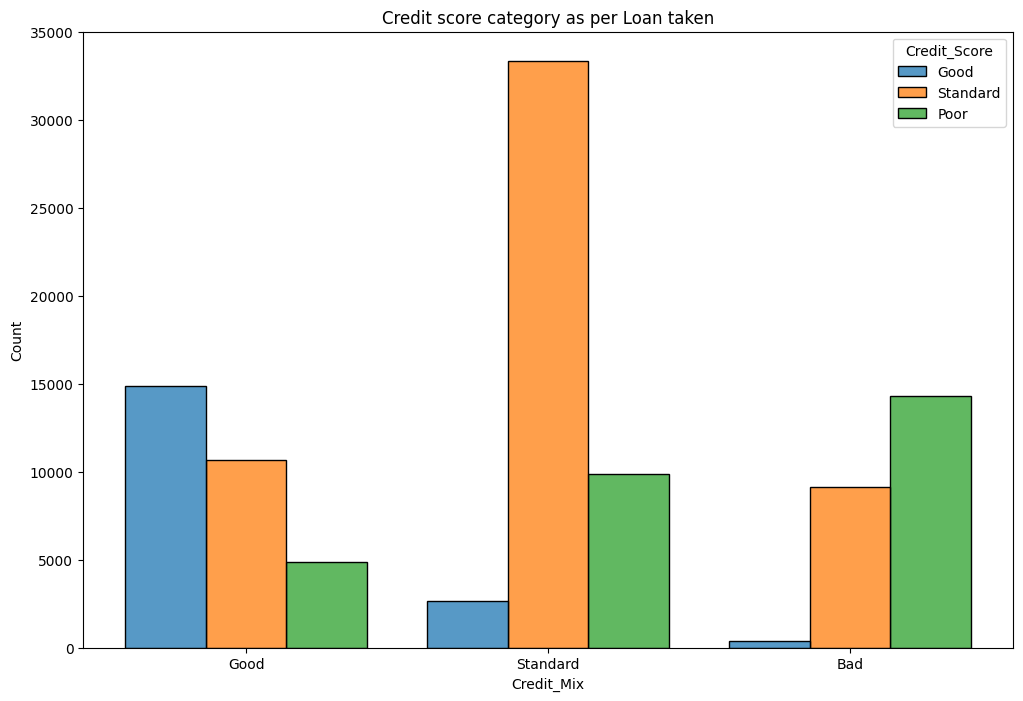

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(data=x,x='Credit_Mix',hue='Credit_Score',multiple='dodge',shrink=0.8)
plt.title('Credit score category as per Loan taken')
plt.show()

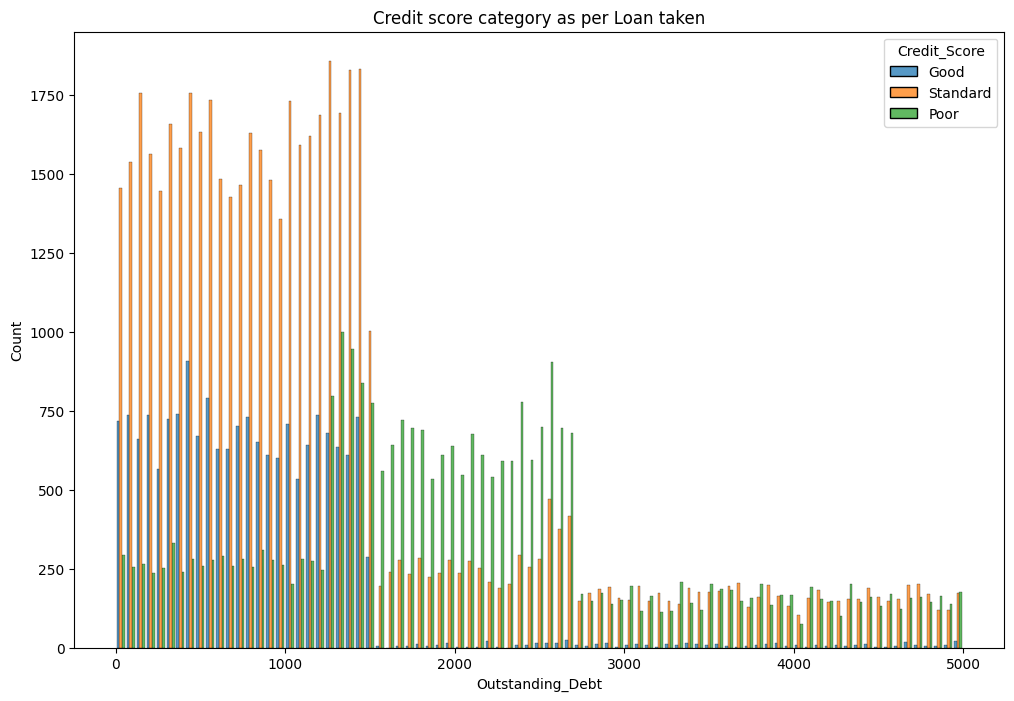

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(data=x,x='Outstanding_Debt',hue='Credit_Score',multiple='dodge',shrink=0.8)
plt.title('Credit score category as per Loan taken')
plt.show()

Model Building

In [19]:
x['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [20]:
#so we can ordinal encode number to Good, standard & bad 3, 2 & 1 repectively.

In [21]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [22]:
from category_encoders import OrdinalEncoder 
maplist = [{'col': 'Credit_Mix', 'mapping': {'Bad':0,'Standard':1, 'Good':2}}]
oe = OrdinalEncoder(mapping=maplist)

In [23]:
x1=x.copy(deep=True)

In [24]:
# cs=[]
# cm=[]

In [25]:
# for i in x1['Credit_Score']:
#   if i=='Poor':
#     cs.append(0)
#   elif i=='Standard':
#     cs.append(1)
#   else:
#     cs.append(2)
  
# for i in x1['Credit_Mix']:
#   if i=='Poor':
#     cm.append(0)
#   elif i=='Standard':
#     cm.append(1)
#   else:
#     cm.append(2)

In [26]:
# x1['Credit_Score']=cs
# x1['Credit_Mix']=cm

In [27]:
x1['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [28]:
x1['Credit_Mix']=oe.fit_transform(x1['Credit_Mix'])

In [29]:
maplist1 = [{'col': 'Credit_Score', 'mapping': {'Poor':0,'Standard':1,'Good':2}}]
oe1 = OrdinalEncoder(mapping=maplist1)

x1['Credit_Score']=oe1.fit_transform(x1['Credit_Score'])

In [30]:
x1['Credit_Score'].value_counts()

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64

In [31]:
x1['Credit_Mix'].value_counts()

1    45848
2    30384
0    23768
Name: Credit_Mix, dtype: int64

In [32]:
x1_test=x_test.copy(deep=True)

x1_test['Credit_Mix']=oe.transform(x1_test['Credit_Mix'])

In [33]:
x1['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [34]:
# Here we can not decide cronological order, so we will do One hot encoding

In [35]:
y=x1.pop('Credit_Score')
x1=pd.get_dummies(x1)

In [36]:
x1.head()

,ID,Customer_ID,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,5634,3392,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,265.0,49.574949,21.46538,312.494089,0,0,1,0,0,0
1,5635,3392,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,266.0,49.574949,21.46538,284.629162,0,0,0,1,0,0
2,5636,3392,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,267.0,49.574949,21.46538,331.209863,0,0,0,0,1,0
3,5637,3392,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,268.0,49.574949,21.46538,223.451310,0,0,0,0,0,1
4,5638,3392,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,269.0,49.574949,21.46538,341.489231,0,1,0,0,0,0


In [37]:
x1_test=pd.get_dummies(x1_test)

Model Training & predictions

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [39]:
cols=['ID','Customer_ID']
x1.drop(cols,axis=1,inplace=True)
x1_test.drop(cols,axis=1,inplace=True)

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x1,y, test_size=.2)

In [41]:
xgb=XGBClassifier(n_estimators=10000, learning_rate=0.1)
xgb.fit(x_train,y_train,early_stopping_rounds=10,eval_set=[(x_val,y_val)],verbose=True)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.04051
[1]	validation_0-mlogloss:0.99115
[2]	validation_0-mlogloss:0.94920
[3]	validation_0-mlogloss:0.91327
[4]	validation_0-mlogloss:0.88243
[5]	validation_0-mlogloss:0.85564
[6]	validation_0-mlogloss:0.83229
[7]	validation_0-mlogloss:0.81190
[8]	validation_0-mlogloss:0.79414
[9]	validation_0-mlogloss:0.77855
[10]	validation_0-mlogloss:0.76470
[11]	validation_0-mlogloss:0.75272
[12]	validation_0-mlogloss:0.74198
[13]	validation_0-mlogloss:0.73232
[14]	validation_0-mlogloss:0.72390
[15]	validation_0-mlogloss:0.71650
[16]	validation_0-mlogloss:0.70955
[17]	validation_0-mlogloss:0.70323
[18]	validation_0-mlogloss:0.69763
[19]	validation_0-mlogloss:0.69266
[20]	validation_0-mlogloss:0.68819
[21]	validation_0-mlogloss:0.68421
[22]	validation_0-mlogloss:0.68046
[23]	validation_0-mlogloss:0.67710
[24]	validation_0-mlogloss:0.67414
[25]	validation_0-mlogloss:0.67132
[26]	validation_0-mlogloss:0.66870
[27]	validation_0-mlogloss:0.66646
[28]	validation_0-mlogloss:0.6

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [44]:
y_pred=xgb.predict(x_val)

In [46]:
from sklearn.metrics import accuracy_score as acc

score=acc(y_val,y_pred)

In [47]:
score

0.8016

Prediction on test data

In [51]:
pred=xgb.predict(x1_test)

In [53]:
x1_test['Predicted_Credit_score']=pred

In [57]:
x1_test['Predicted_Credit_score'].value_counts()

1    25910
0    14708
2     9382
Name: Predicted_Credit_score, dtype: int64

In [58]:
x1_test.head()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Predicted_Credit_score
0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,...,49.574949,21.465380,186.266702,0,0,0,0,0,1,2
1,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,13.27,4.0,2,...,49.574949,21.465380,361.444004,0,1,0,0,0,0,2
2,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,12.27,4.0,2,...,49.574949,21.465380,264.675446,0,0,0,0,1,0,2
3,1824.843333,3.0,4.0,3.0,4.0,4.0,5.0,11.27,4.0,2,...,49.574949,21.465380,343.826873,0,1,0,0,0,0,2
4,3037.986667,2.0,4.0,6.0,1.0,3.0,1.0,5.42,5.0,2,...,18.816215,39.684018,485.298434,1,0,0,0,0,0,2
